In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from head import Emulator, Grid

In [29]:
sim = Emulator()

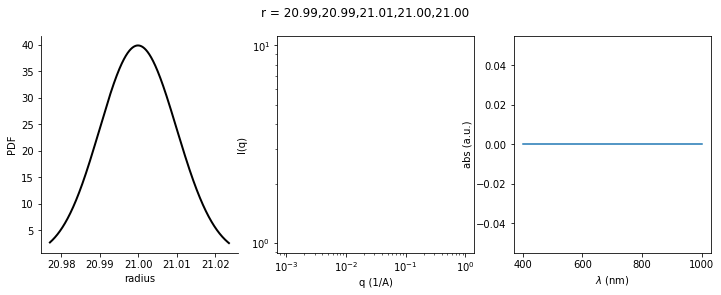

In [49]:
fig, axs = plt.subplots(1,3,figsize=(4*3,4))
sim.make_structure(r_mu=20,r_sigma=0.01)
sim.plot_radii(axs[0])
axs[0].set_xlabel('radius')
axs[0].set_ylabel('PDF')

q, pq = sim.get_saxs()
axs[1].plot(q, pq)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
plt.setp(axs[1], xlabel='q (1/A)', ylabel='I(q)')

wl, abs_ = sim.get_spectrum(n_samples=10)
axs[2].plot(wl, abs_)
plt.setp(axs[2], xlabel=r'$\lambda$ (nm)', ylabel='abs (a.u.)')

fig.suptitle('r = '+','.join('%.2f'%i for i in sim.radii))
plt.show()

 /Users/pozzolabadmin/Google Drive/Projects/Genetic_Algorithm/head/designspace.py:62: FutureWarning:arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


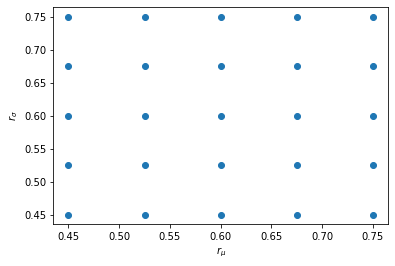

In [9]:
X = np.linspace(0.45,0.75, num=5) 
Y = np.linspace(0.45,0.75, num=5)
grid = Grid(X,Y)
fig, ax = plt.subplots()
ax.scatter(grid.points[:,0], grid.points[:,1])
ax.set_xlabel(r'$r_{\mu}$')
ax.set_ylabel(r'$r_{\sigma}$')
plt.show()

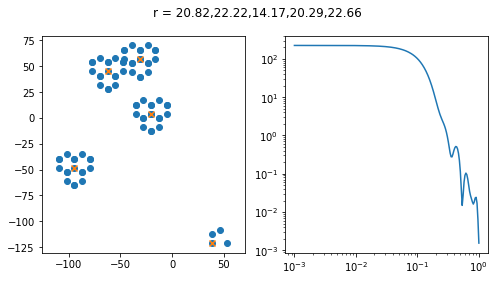

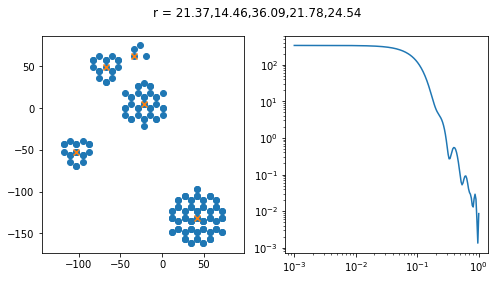

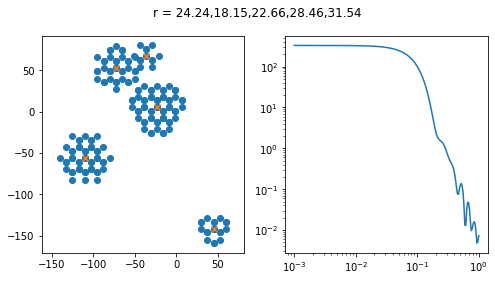

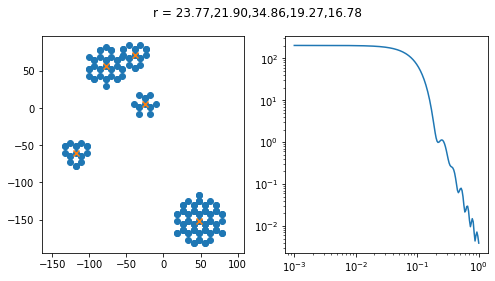

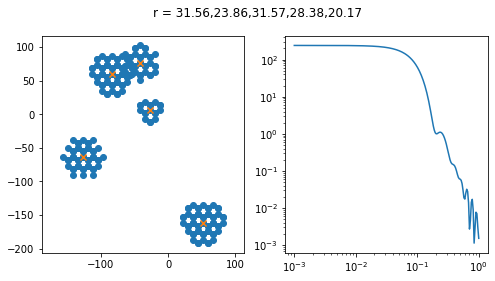

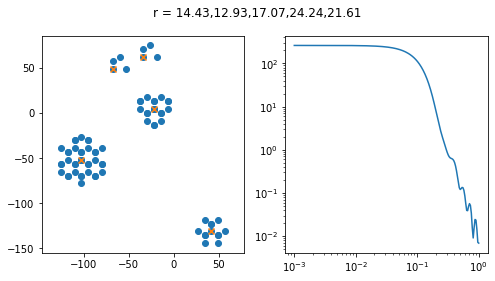

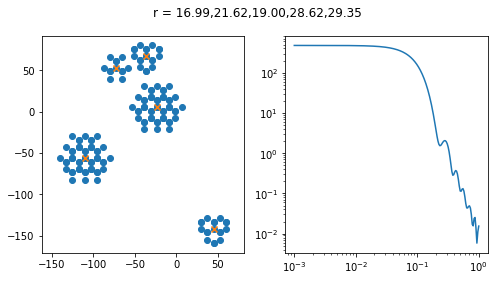

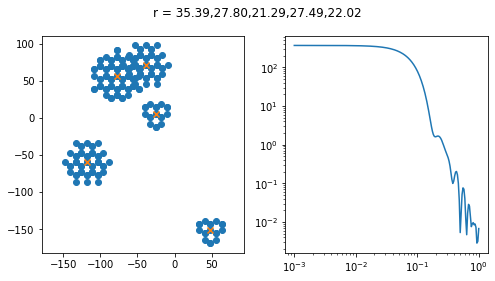

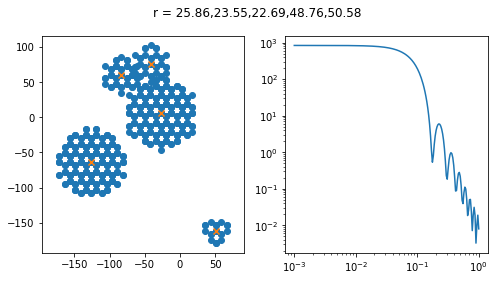

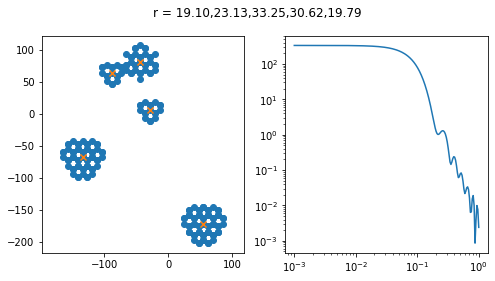

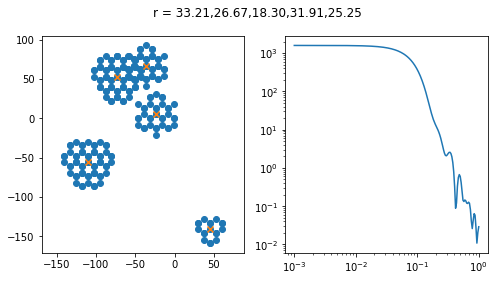

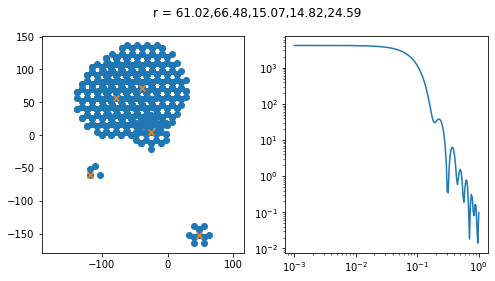

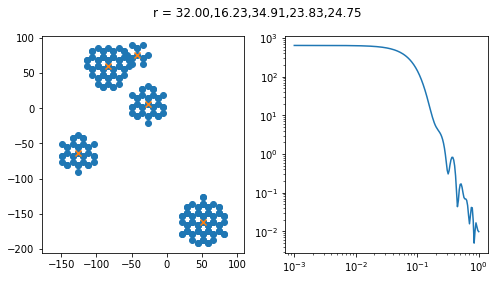

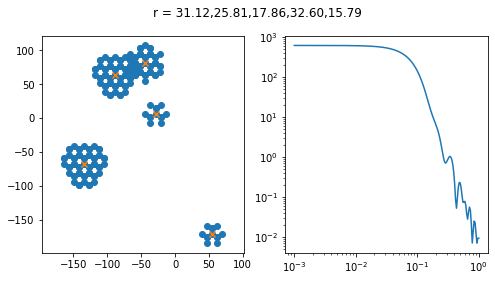

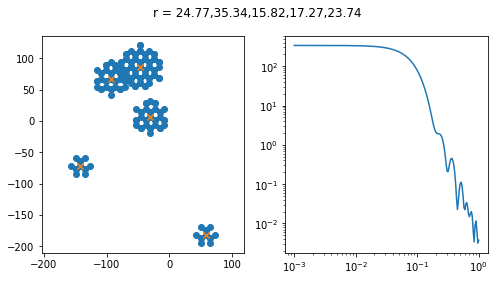

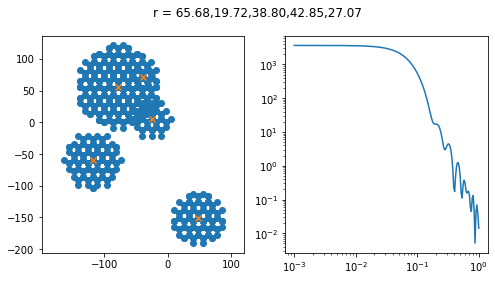

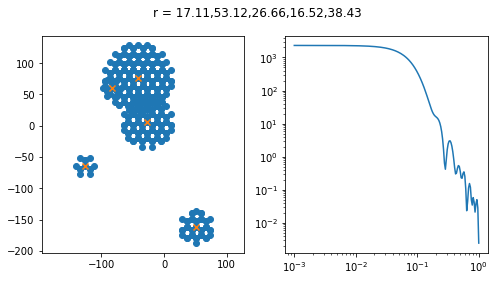

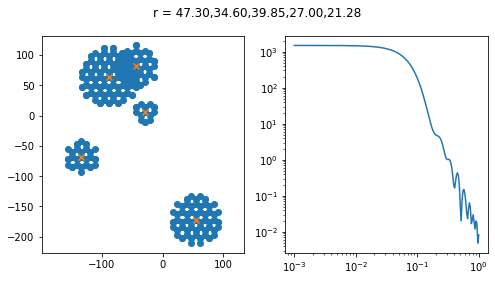

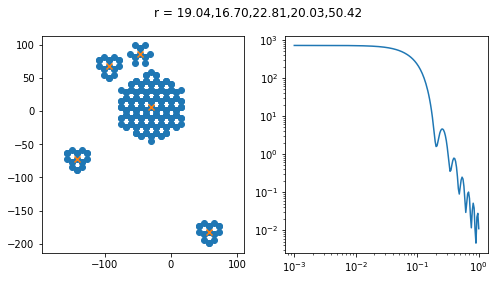

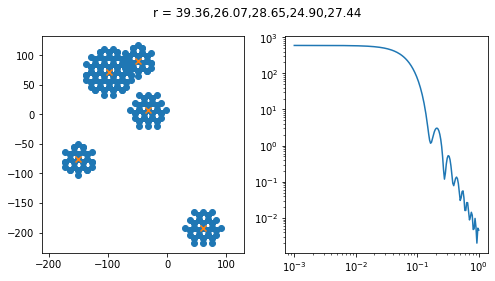

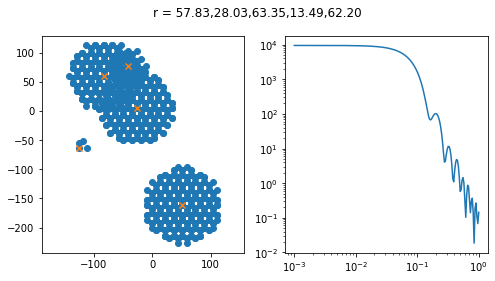

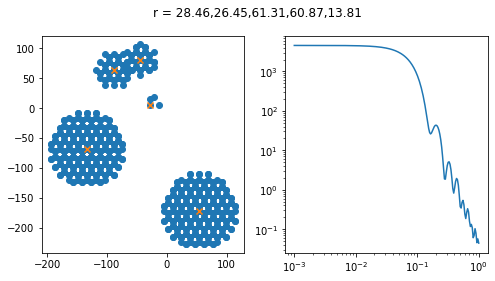

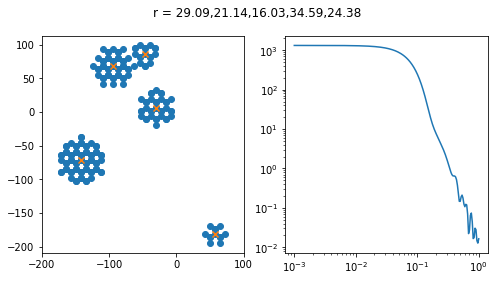

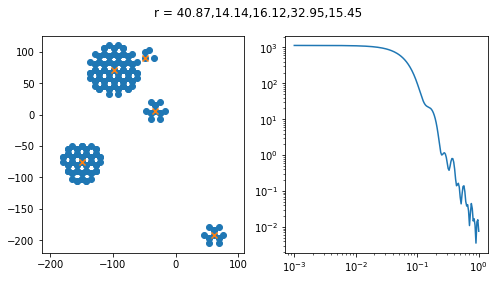

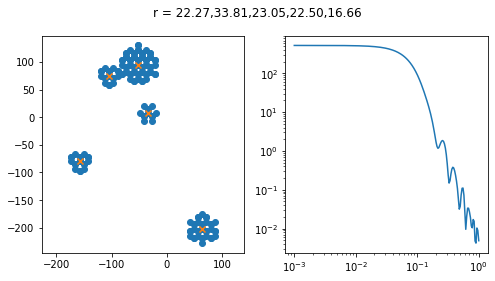

In [11]:
for i in grid:
    fig, axs = plt.subplots(1,2,figsize=(8,4))
    sim.make_structure(r_mu=i[0],r_sigma=i[1])
    sim.plot_structure2d(ax=axs[0])
    q, pq = sim.get_saxs()
    axs[1].plot(q, pq)
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    fig.suptitle('r = '+','.join('%.2f'%i for i in sim.step*sim.radii))
    plt.show()